# Logistic Regression Model for Credit Card Fraud Detection

## Importing Libraries and Dataset

In [1]:
#installing iblearn
!pip install imblearn

In [1]:
#importing libraries
import pandas as pd        #for dataframe data structure
import numpy as np         # for numpy arrays and scientific computations

import matplotlib.pyplot as plt      #for data visualization
%matplotlib inline

from sklearn.linear_model import LogisticRegression    #for LogisticRegression Model
from sklearn import metrics                            #for evaluation metrics
                                                       
import seaborn as sns                                  #for visualization
from sklearn.preprocessing import StandardScaler       #for Data Preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [2]:
from imblearn.over_sampling import SMOTE               #for SMOTE Oversampling

Using TensorFlow backend.


## Data Overview

In [3]:
#importing dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data=df.sample(frac=1,random_state=1)
print(data.shape)

(284807, 31)


## Data Normalization

In [5]:
#Normalizing the Amount column
df['normAmount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1)) 

In [6]:
data=df.sample(frac=1,random_state=1)
print(data.shape)

(284807, 32)


In [7]:
#Creating predictor and target variables
X=data.copy()
X.drop(['Class'],axis=1,inplace=True)
y=data['Class']

## Data Splitting

In [8]:
#Splitting dataset into Trainset and Testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (227845, 31)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 31)
Number transactions y_test dataset:  (56962,)


## Data Modeling

## 1.Selecting the Best Sampling Technique

### 1. No Sampling

In [9]:
lr=LogisticRegression(C=0.01,solver='liblinear')
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)

T1=metrics.accuracy_score(y_test,yhat)
L1=metrics.log_loss(y_test,yhat)
F1=metrics.f1_score(y_test,yhat,average='weighted')
C1=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T1)
print("Log Loss : ",L1)
print("F1- Score : ",F1)
print("Classification Report : ",C1)

Test Accuracy score :  0.9991046662687406
Log Loss :  0.030924026327841993
F1- Score :  0.9990836074436179
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.77      0.70      0.73       100

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
#saving accuracy results
one=pd.DataFrame([T1,L1,F1,1.00,0.70])

###  2. SMOTE Oversampling

The dataset creditcasrd.csv that we are dealing with is imbalanced i.e. very less cases of one type and huge of other. These creates a bias in the modeling classifier and leads to mislearning. One approach to addresse imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [11]:
print("Before OverSampling - counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling - counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling - counts of label '1': 392
Before OverSampling - counts of label '0': 227453 



In [12]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling - the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling - the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling - counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling - counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling - the shape of train_X: (454906, 31)
After OverSampling - the shape of train_y: (454906,) 

After OverSampling - counts of label '1': 227453
After OverSampling - counts of label '0': 227453


In [13]:
lr=LogisticRegression(C=0.01,solver='liblinear')
lr.fit(X_train_res,y_train_res)
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)

T2=metrics.accuracy_score(y_test,yhat)
L2=metrics.log_loss(y_test,yhat)
F2=metrics.f1_score(y_test,yhat,average='weighted')
C2=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T2)
print("Log Loss : ",L2)
print("F1- Score : ",F2)
print("Classification Report : ",C2)

Test Accuracy score :  0.9821108809381693
Log Loss :  0.6178824468983024
F1- Score :  0.9894841680608832
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.08      0.90      0.15       100

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [52]:
#saving accuracy results
two=pd.DataFrame([T2,L2,F2,0.98,0.90])

### 3. NearMiss Undersampling

The dataset creditcasrd.csv that we are dealing with is imbalanced i.e. very less cases of one type and huge of other. These creates a bias in the modeling classifier and leads to mislearning. Another approach to addresse imbalanced datasets is to undersample the majority class. TUndersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution.Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution.

In [15]:
print("Before Undersampling - counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling - counts of label '0': {} \n".format(sum(y_train == 0))) 

Before Undersampling - counts of label '1': 392
Before Undersampling - counts of label '0': 227453 



In [16]:
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling - the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling - the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling - counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling - counts of label '0': {}".format(sum(y_train_miss == 0))) 


After Undersampling - the shape of train_X: (784, 31)
After Undersampling - the shape of train_y: (784,) 

After Undersampling - counts of label '1': 392
After Undersampling - counts of label '0': 392


In [17]:
lr=LogisticRegression(C=0.01,solver='liblinear')
lr.fit(X_train_miss,y_train_miss)
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)

T3=metrics.accuracy_score(y_test,yhat)
L3=metrics.log_loss(y_test,yhat)
F3=metrics.f1_score(y_test,yhat,average='weighted')
C3=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T3)
print("Log Loss : ",L3)
print("F1- Score : ",F3)
print("Classification Report : ",C3)

Test Accuracy score :  0.7979003546223798
Log Loss :  6.980435989358537
F1- Score :  0.8858530183055309
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.80      0.89     56862
           1       0.01      0.95      0.02       100

    accuracy                           0.80     56962
   macro avg       0.50      0.87      0.45     56962
weighted avg       1.00      0.80      0.89     56962



In [53]:
#saving accuracy results
three=pd.DataFrame([T3,L3,F3,0.80,0.95])

In [19]:
X_train=X_train_res
y_train=y_train_res

We find that the OverSmapling Techinique gives the best model acuuracy.
Therefore, moving ahead using Oversampling datasets.

## 2.Selecting the Best Solver 

### 1.liblinear solver

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01,solver='liblinear')
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
T4=metrics.accuracy_score(y_test,yhat)
L4=metrics.log_loss(y_test,yhat)
F4=metrics.f1_score(y_test,yhat,average='weighted')
C4=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T4)
print("Log Loss : ",L4)
print("F1- Score : ",F4)
print("Classification Report : ",C4)

Test Accuracy score :  0.9821108809381693
Log Loss :  0.6178824468983024
F1- Score :  0.9894841680608832
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.08      0.90      0.15       100

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [58]:
#saving accuracy results
four=pd.DataFrame([T4,L4,F4,0.98,0.90])

### 2. saga solver

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01,solver='saga')
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)
lr

C:\Users\bhave\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
T5=metrics.accuracy_score(y_test,yhat)
L5=metrics.log_loss(y_test,yhat)
F5=metrics.f1_score(y_test,yhat,average='weighted')
C5=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T5)
print("Log Loss : ",L5)
print("F1- Score : ",F5)
print("Classification Report : ",C5)

Test Accuracy score :  0.9249148555177136
Log Loss :  2.5934085203212605
F1- Score :  0.9593113054959429
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.93      0.96     56862
           1       0.01      0.62      0.03       100

    accuracy                           0.92     56962
   macro avg       0.51      0.77      0.49     56962
weighted avg       1.00      0.92      0.96     56962



In [54]:
#saving accuracy results
five=pd.DataFrame([T5,L5,F5,0.93,0.62])

### 3. lbfgs solver

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01,solver='lbfgs')
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
T6=metrics.accuracy_score(y_test,yhat)
L6=metrics.log_loss(y_test,yhat)
F6=metrics.f1_score(y_test,yhat,average='weighted')
C6=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T6)
print("Log Loss : ",L6)
print("F1- Score : ",F6)
print("Classification Report : ",C6)

Test Accuracy score :  0.9798988799550578
Log Loss :  0.6942840229496164
F1- Score :  0.9883319570806999
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.07      0.90      0.14       100

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [55]:
#saving accuracy results
six=pd.DataFrame([T6,L6,F6,0.98,0.90])

In [30]:
best_solver='liblinear'

We find that that the liblinear solver proves to be the best among others.Therefore moving ahead ushing liblinear as solver

## 3. Selecting Best value of C

### 1. Using GridSearchCV()

In [33]:
par=[{'C':[0.001,0.01,0.1,1,10,100,1000]}]
lr=LogisticRegression(solver=best_solver)
Grid=GridSearchCV(lr,par,cv=5)

In [34]:
Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
Grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
Grid.cv_results_['mean_test_score']

array([0.96801757, 0.96802197, 0.96802856, 0.96802856, 0.96802856,
       0.96802856, 0.96802856])

Best value according to the GridSearchCV() is C=0.1

### 2. Using mean and standard accuracy

In [37]:
lr=LogisticRegression()

In [38]:
#Finding the best value of C
C = [0.001,0.01,0.1,1,10,100,1000]

mean_acc = np.zeros(len(C))
std_acc = np.zeros(len(C))

for n,c in enumerate(C):
    #Train Model and Predict  
    lr = LogisticRegression(C=c,solver=best_solver)
    lr.fit(X_train,y_train)
    yhat=lr.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
        
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98260244, 0.98211088, 0.98209333, 0.98209333, 0.98209333,
       0.98209333, 0.98209333])

In [39]:
print ('Best of C : {}'.format(C[mean_acc.argmax()]))

Best of C : 0.001


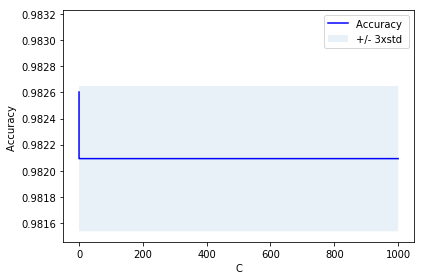

In [40]:
plt.plot(C,mean_acc,'b')
plt.fill_between(C,mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('C')
#plt.xlim(0.001,)
plt.tight_layout()
plt.show()

In [41]:
best_c=0.001

We find that that the value C = 0.001 proves to be the best among others.Therefore moving ahead using C as 0.001

## Modeling using the best parameters

In [44]:
best_lr= LogisticRegression(C=best_c, solver=best_solver)
best_lr.fit(X_train,y_train)
yhat=best_lr.predict(X_test)
yhat_prob=best_lr.predict_proba(X_test)

T7=metrics.accuracy_score(y_test,yhat)
L7=metrics.log_loss(y_test,yhat)
F7=metrics.f1_score(y_test,yhat,average='weighted')
C7=metrics.classification_report(y_test,yhat)
print("Test Accuracy score : ",T7)
print("Log Loss : ",L7)
print("F1- Score : ",F7)
print("Classification Report : ",C7)


Test Accuracy score :  0.982602436712194
Log Loss :  0.6009043188868992
F1- Score :  0.9897406052823171
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.08      0.90      0.15       100

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [56]:
#saving accuracy results
seven=pd.DataFrame([T7,L7,F7,0.98,0.90])

## Final Report

In [69]:
print("===============================    Logistic Regression Analysis Report   ===============================")
res=pd.concat([one,two,three,four,five,six,seven],axis=1)
rows=pd.DataFrame(['Accuracy Score','Log Loss','F1-Score','Class0 Recall','Class1 Recall'])
res=pd.concat([res,rows],axis=1)
res.columns=['No Sampling','SMOTE Oversampling','NearMiss Undersampling','liblinear solver','saga solver','lbfgs solver','BEST MODEL','Criteria']
res.set_index("Criteria", inplace = True) 
res

===============================    Logistic Regression Analysis Report   ===============================


,No Sampling,SMOTE Oversampling,NearMiss Undersampling,liblinear solver,saga solver,lbfgs solver,BEST MODEL
Criteria,,,,,,,
Accuracy Score,0.999105,0.982111,0.797900,0.982111,0.924915,0.979899,0.982602
Log Loss,0.030924,0.617882,6.980436,0.617882,2.593409,0.694284,0.600904
F1-Score,0.999084,0.989484,0.885853,0.989484,0.959311,0.988332,0.989741
Class0 Recall,1.000000,0.980000,0.800000,0.980000,0.930000,0.980000,0.980000
Class1 Recall,0.700000,0.900000,0.950000,0.900000,0.620000,0.900000,0.900000


,No Sampling,SMOTE Oversampling,NearMiss Undersampling,liblinear solver,saga solver,lbfgs solver,Best Model
Criteria,,,,,,,
Accuracy Score,0.999105,0.982111,0.797900,0.982111,0.924915,0.979899,0.982602
Log Loss,0.030924,0.617882,6.980436,0.617882,2.593409,0.694284,0.600904
F1-Score,0.999084,0.989484,0.885853,0.989484,0.959311,0.988332,0.989741
Class0 Recall,1.000000,0.980000,0.800000,0.980000,0.930000,0.980000,0.980000
Class1 Recall,0.700000,0.900000,0.950000,0.900000,0.620000,0.900000,0.900000
